In [1]:
import group_data as gd
import flylib
import numpy as np

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [3]:
import h5py
trial_db = h5py.File('trial_db.hdf5','r')
xi = np.linspace(0,23,1150)
tlag = xi-xi[1150/2.0]
tlag = tlag[:1149]
muscle_list =  ['b1','b2','b3',
                'i1','i2',
                'iii1','iii3','iii24',
                'hg1','hg2','hg3','hg4',
                'tpd','tpv','ttm','pr','wb_frequency']
swarm_names = np.array(trial_db['swarm_names'])
fly_numbers = np.array(trial_db['fly_numbers'])
wb_frequency = np.array(trial_db['wb_frequency'])
trial_names = np.array(trial_db['trial_names'])
wb_selection = np.sum(wb_frequency >50,axis = 1)>1000
swarm_set = [sw for sw in set(swarm_names) if not('pr' in sw)]
fly_set = set(fly_numbers)

/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


In [85]:
extract = np.array(trial_db[mname])[selection,:]
#gca().set_xbound(200,400)
#gca().set_ybound(-10,250)


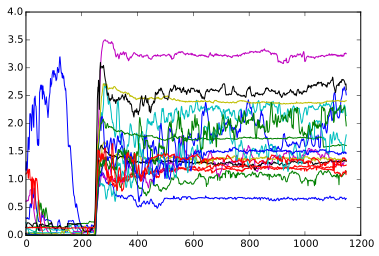

In [17]:
swarm = 'GMR22H05'
mname = 'b1'
stop_dict = dict()
trial_selection = (trial_names == 'flight_starts')

swarm_selection = (swarm == swarm_names) & trial_selection
for flynum in fly_set:
    selection  = (flynum == fly_numbers) & swarm_selection
    if sum(selection) > 2:
        extract = np.array(trial_db['wb_frequency'])[selection,:]
        include = np.sum(extract[:,0:200].T>10,axis = 0) < 100
        #print include
        if sum(include)>0:
            trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
            plot(trace)


308
309
310
311
312
314
315
317
327
328
455
456
462
463
468
470


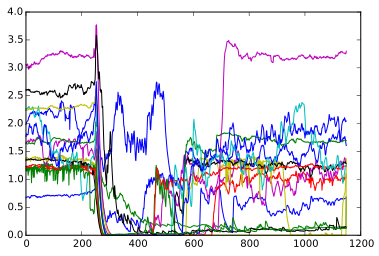

In [10]:
swarm = 'GMR22H05'
mname = 'b1'
trial_selection = (trial_names == 'flight_stops')
swarm_selection = (swarm == swarm_names) & trial_selection
for flynum in fly_set:
    selection  = (flynum == fly_numbers) & swarm_selection
    if sum(selection) > 2:
        extract = np.array(trial_db['wb_frequency'])[selection,:]
        include = np.sum(extract[:,225:500].T>10,axis = 0) < 100
        trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
        plot(trace)


In [24]:
#calculate the median xcov functions and
#load into a dictionary keyed by group and then muscle
start_dict = dict()
trial_selection = (trial_names == 'flight_starts')
#wb_selection = np.sum(wb_frequency >50)>1000
#wb_selection &= trial_selection
for swarm in swarm_set:
    print swarm
    swarm_selection = (swarm == swarm_names) & trial_selection
    start_dict[swarm] = dict()
    for mname in muscle_list:
        start_dict[swarm][mname] = list()
        for flynum in fly_set:
            selection  = (flynum == fly_numbers) & swarm_selection
            if sum(selection) > 2:
                extract = np.array(trial_db['wb_frequency'])[selection,:]
                include = np.sum(extract[:,0:200].T>10,axis = 0) < 100
                if sum(include)>2:
                    trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
                    start_dict[swarm][mname].append(trace) 

GMR22H05_GFP
GMR31E10
GMR75B06_GFP
GMR22H05
GMR29E05_GFP
GMR39E01
GMR31E10_GFP
GMR10A12
GMR74F03_GFP
GMR75B06
GMR74F03
GMR29E05
GMR10A12_GFP


In [19]:
#calculate the median xcov functions and
#load into a dictionary keyed by group and then muscle
stop_dict = dict()
trial_selection = (trial_names == 'flight_stops')
#wb_selection = np.sum(wb_frequency >50)>1000
#wb_selection &= trial_selection
for swarm in swarm_set:
    print swarm
    swarm_selection = (swarm == swarm_names) & trial_selection
    stop_dict[swarm] = dict()
    for mname in muscle_list:
        stop_dict[swarm][mname] = list()
        for flynum in fly_set:
            selection  = (flynum == fly_numbers) & swarm_selection
            if sum(selection) > 2:
                extract = np.array(trial_db['wb_frequency'])[selection,:]
                include = np.sum(extract[:,225:500].T>10,axis = 0) < 100
                if sum(include)>0:
                    trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
                    stop_dict[swarm][mname].append(trace)

GMR22H05_GFP
GMR31E10
GMR75B06_GFP
GMR22H05
GMR29E05_GFP
GMR39E01
GMR31E10_GFP
GMR10A12
GMR74F03_GFP
GMR75B06
GMR74F03
GMR29E05
GMR10A12_GFP


In [25]:
import h5py
import os
#os.listdir('./')
os.remove('start_db.hdf5')
start_db = h5py.File('start_db.hdf5','a')
for key in start_dict:
    start_db.create_group(key)
    for key2 in start_dict[key].keys():
        start_db[key].create_dataset(key2,data = np.array(start_dict[key][key2]),  compression="gzip",compression_opts=5)
start_db.flush()

In [26]:
import h5py
import os
#os.listdir('./')
os.remove('stop_db.hdf5')
stop_db = h5py.File('stop_db.hdf5','a')
for key in stop_dict:
    stop_db.create_group(key)
    for key2 in stop_dict[key].keys():
        stop_db[key].create_dataset(key2,data = np.array(stop_dict[key][key2]),  compression="gzip",compression_opts=5)
stop_db.flush()

In [23]:
stop_dict

{'GMR10A12': {'b1': [array([ 0.48032393,  0.48085337,  0.48243808, ...,  0.45016802,
           0.44572755,         nan]),
   array([ 0.69194995,  0.69401473,  0.68428682, ...,  0.61394399,
           0.61792114,         nan])],
  'b2': [array([ 0.04382717,  0.04173072,  0.03965537, ...,  0.01935687,
           0.02144767,         nan]),
   array([ 0.00275316,  0.00299684,  0.00245654, ...,  0.01256592,
           0.01907852,         nan])],
  'b3': [array([ 0.24932055,  0.25367145,  0.25293308, ...,  0.27851074,
           0.28482279,         nan]),
   array([ 0.30650234,  0.30781106,  0.29929166, ...,  0.3215455 ,
           0.32186503,         nan])],
  'hg1': [array([ 0.17184622,  0.16789014,  0.16104356, ...,  0.16133334,
           0.16060536,         nan]),
   array([ 0.        ,  0.        ,  0.        , ...,  0.0670488 ,
           0.06682357,         nan])],
  'hg2': [array([ 0.        ,  0.        ,  0.        , ...,  0.04305957,
           0.04326473,         nan]),
   arra